# 파이썬 4월 18일 강의 복습
> "7월 3일"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최석진
- categories: [Python]

## numpy 
### (메소드 도움말확인, hstack,vstack,append,ravel,flatten, 기타통계함수들, dtype,브로드캐스팅)
## matplotlib
### (plt.pyplot,plt.hist)

In [1]:
import numpy as np

In [2]:
### 넘파이공부 7단계

#### note 1 : 메소드 도움말 확인하기

`-` 파이썬에서 함수를 적용하는 2가지 방식

- np.sum(a)
- a.sum()

In [3]:
a=np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [4]:
a.sum()

15

In [6]:
np.sum(a)

15

`-` 넘파이에서 `a.sum()`에 대한 도움말은 `np.sum()`에 자세히 나와있음 $\to$ `np.sum()`의 도움말을 확인하고 `np.sum(a)` 와`a.sum()`이 동일함을 이용하여 `a.sum()`의 사용법을 미루어 유추

In [7]:
a.sum?

Docstring:
a.sum(axis=None, dtype=None, out=None, keepdims=False, initial=0, where=True)

Return the sum of the array elements over the given axis.

Refer to `numpy.sum` for full documentation.

See Also
--------
numpy.sum : equivalent function
Type:      builtin_function_or_method


In [8]:
np.sum?

Signature:
np.sum(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
Docstring:
Sum of array elements over a given axis.

Parameters
----------
a : array_like
    Elements to sum.
axis : None or int or tuple of ints, optional
    Axis or axes along which a sum is performed.  The default,
    axis=None, will sum all of the elements of the input array.  If
    axis is negative it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If axis is a tuple of ints, a sum is performed on all of the axes
    specified in the tuple instead of a single axis or all the axes as
    before.
dtype : dtype, optional
    The type of the returned array and of the accumulator in which the
    elements are summed.  The dtype of `a` is used by default unless `a`
    has an integer dtype of less precision than the default platform
    integer.  In that case, if `a` is signed then the platform integer
    is used w

#### note 2: hstack,vstack

`-` hstack,vstack 을 사용하기도 함

In [9]:
a=np.arange(6)
b=-a

In [10]:
np.vstack([a,b])

array([[ 0,  1,  2,  3,  4,  5],
       [ 0, -1, -2, -3, -4, -5]])

In [11]:
np.stack([a,b],axis=0)

array([[ 0,  1,  2,  3,  4,  5],
       [ 0, -1, -2, -3, -4, -5]])

In [12]:
np.hstack([a,b])

array([ 0,  1,  2,  3,  4,  5,  0, -1, -2, -3, -4, -5])

In [15]:
np.concatenate([a,b],axis=0)

array([ 0,  1,  2,  3,  4,  5,  0, -1, -2, -3, -4, -5])

#### note 3: append

`-` 기능1: reshape(-1) + concat

In [16]:
a=np.arange(30).reshape(5,6)
b=-np.arange(8).reshape(2,2,2)

In [17]:
a.shape,b.shape

((5, 6), (2, 2, 2))

In [18]:
np.append(a,b)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0, -1, -2, -3,
       -4, -5, -6, -7])

In [19]:
np.concatenate([a.reshape(-1),b.reshape(-1)])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0, -1, -2, -3,
       -4, -5, -6, -7])

`-` 기능2:concat

In [20]:
a=np.arange(2*3*4).reshape(2,3,4)
b=-a

In [21]:
a.shape,b.shape,np.append(a,b,axis=0).shape

((2, 3, 4), (2, 3, 4), (4, 3, 4))

In [22]:
a.shape,b.shape,np.append(a,b,axis=1).shape

((2, 3, 4), (2, 3, 4), (2, 6, 4))

In [23]:
a.shape,b.shape,np.append(a,b,axis=2).shape

((2, 3, 4), (2, 3, 4), (2, 3, 8))

`-` concat과의 차이?

In [24]:
a=np.arange(2*3*4).reshape(2,3,4)
b=-a
c=2*a

In [25]:
np.append(a,b,c,axis=0)

TypeError: _append_dispatcher() got multiple values for argument 'axis'

In [26]:
np.concatenate([a,b,c],axis=0)

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]],

       [[  0,  -1,  -2,  -3],
        [ -4,  -5,  -6,  -7],
        [ -8,  -9, -10, -11]],

       [[-12, -13, -14, -15],
        [-16, -17, -18, -19],
        [-20, -21, -22, -23]],

       [[  0,   2,   4,   6],
        [  8,  10,  12,  14],
        [ 16,  18,  20,  22]],

       [[ 24,  26,  28,  30],
        [ 32,  34,  36,  38],
        [ 40,  42,  44,  46]]])

#### note 4:ravel,flatten

In [27]:
a=np.arange(2*3*4).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [28]:
a.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [29]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [30]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

#### note 5:기타통계함수들

In [31]:
a=np.random.normal(loc=0,scale=2,size=(100,))
a

array([ 2.81062802, -2.4301234 ,  0.40879425,  2.77771522,  1.92859426,
        2.00610157,  1.06575886, -2.77097369, -3.9386702 , -1.26048623,
       -0.06133352, -0.1160439 ,  2.3494638 ,  0.66132059, -0.30688048,
        2.98691651, -3.12728855, -1.11986608, -1.32337034, -5.57809365,
       -1.38711156,  0.01856731, -2.85427416,  0.47741577, -3.44474007,
       -0.3378466 ,  0.90387286,  0.83311123, -2.33647632,  0.97833108,
        1.82084671, -3.38514478,  0.19110647,  5.40099637,  1.98762091,
        3.87812786,  0.90118717, -0.89648484, -1.56111551,  1.05940088,
        0.62824101, -0.08285867,  1.04666925, -0.2851731 , -2.53994167,
        2.48729518, -1.06903678, -0.8965832 ,  0.22236028,  2.01309282,
       -0.49004219, -3.29048394,  2.20190855, -0.35925617,  2.87697529,
        4.08590117, -2.58177539, -0.31202583, -0.61927845,  0.24311466,
       -0.75992627, -1.70688199, -3.37138253,  4.15561096, -1.27976044,
       -0.25469394, -0.60203644,  0.08309388, -3.22862701, -0.60

In [32]:
np.mean(a)

-0.06181331187777214

In [33]:
np.median(a)

-0.0720960928921066

In [34]:
np.std(a)

2.0704650911911333

In [35]:
np.var(a)

4.286825693841108

`-` corr matrix, cov matrix

In [36]:
np.random.seed(43052)
x=np.random.randn(10000)
y=np.random.randn(10000)*2
z=np.random.randn(10000)*0.5

In [38]:
np.corrcoef([x,y,z]).round(2)

array([[ 1.  , -0.01,  0.01],
       [-0.01,  1.  ,  0.  ],
       [ 0.01,  0.  ,  1.  ]])

In [39]:
np.cov([x,y,z]).round(2)

array([[ 0.99, -0.02,  0.  ],
       [-0.02,  4.06,  0.  ],
       [ 0.  ,  0.  ,  0.25]])

#### note 6:dtype

`-` np.array는 항상 dtype이 있음.

In [41]:
a=np.array([1,2,3])
a

array([1, 2, 3])

In [42]:
a.dtype

dtype('int64')

In [43]:
a=np.array([1.0,2.0,3.0])
a

array([1., 2., 3.])

In [44]:
a.dtype

dtype('float64')

`-` 같은 int라도 int16,int32,int64 로 나누어짐

`-` float도 float16,float32,float64 로 나누어짐

`-` 데이터타입은 아래와 같은 방법으로 변환시킬 수 있음.

In [45]:
a=np.array([1,2,3],dtype=np.int32)
a

array([1, 2, 3], dtype=int32)

In [46]:
a=a.astype(dtype=np.int64)
a

array([1, 2, 3])

In [47]:
a.dtype

dtype('int64')

`-` 문자열의 경우

In [48]:
a=np.array(['a','b','c'])
a

array(['a', 'b', 'c'], dtype='<U1')

In [49]:
a=np.array(['ab','b','c'])
a

array(['ab', 'b', 'c'], dtype='<U2')

In [50]:
a=np.array(['abcdef','b','c'])
a

array(['abcdef', 'b', 'c'], dtype='<U6')

`-` 문자열 + 숫자혼합 => 문자열로 통일

In [51]:
a=np.array(['a',1])
a

array(['a', '1'], dtype='<U21')

In [52]:
a=np.array(['a',1.0])
a

array(['a', '1.0'], dtype='<U32')

`-` 숫자를 문자열로 전환

In [53]:
a=np.array([1,2,3])
a

array([1, 2, 3])

In [54]:
a.astype(np.str_)

array(['1', '2', '3'], dtype='<U21')

#### note 7: 브로드캐스팅과 시간측정

(예비학습)

In [55]:
import time

In [56]:
t1=time.time()

In [57]:
t2=time.time()
t2-t1

11.007585048675537

(예제) x=[0,1,2,3,4]인 벡터가 있을 때, (i,j)의 원소가 `(x[i]-x[j])**2` 을 의미하는 5X5 매트릭스를 구함

(풀이1)

In [58]:
x=np.array(range(5))
x

array([0, 1, 2, 3, 4])

In [59]:
dist=np.zeros([5,5])
dist

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [60]:
for i in range(5):
    for j in range(5):
        dist[i,j]=(x[i]-x[j])**2

In [61]:
dist

array([[ 0.,  1.,  4.,  9., 16.],
       [ 1.,  0.,  1.,  4.,  9.],
       [ 4.,  1.,  0.,  1.,  4.],
       [ 9.,  4.,  1.,  0.,  1.],
       [16.,  9.,  4.,  1.,  0.]])

(풀이2)

In [62]:
x1=x.reshape(5,1)
x2=x.reshape(1,5)

In [63]:
x1

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [64]:
x2

array([[0, 1, 2, 3, 4]])

In [65]:
x1-x2

array([[ 0, -1, -2, -3, -4],
       [ 1,  0, -1, -2, -3],
       [ 2,  1,  0, -1, -2],
       [ 3,  2,  1,  0, -1],
       [ 4,  3,  2,  1,  0]])

In [66]:
(x1-x2)**2

array([[ 0,  1,  4,  9, 16],
       [ 1,  0,  1,  4,  9],
       [ 4,  1,  0,  1,  4],
       [ 9,  4,  1,  0,  1],
       [16,  9,  4,  1,  0]])

---

In [67]:
y=np.array(range(10000))
dist=np.zeros([10000,10000])

In [68]:
t1=time.time()
for i in range(10000):
    for j in range(10000):
        dist[i,j]=(y[i]-y[j])**2
t2=time.time()
t2-t1

52.08049702644348

In [69]:
y1=y.reshape(10000,1).astype(np.float64)
y2=y.reshape(1,10000).astype(np.float64)

In [70]:
t1=time.time()
dist2=(y1-y2)**2
t2=time.time()
t2-t1

0.6161599159240723

In [71]:
(dist-dist2).sum()

0.0

### matplotlib

In [72]:
import matplotlib.pyplot as plt

#### plt.plot

`-` 기본그림

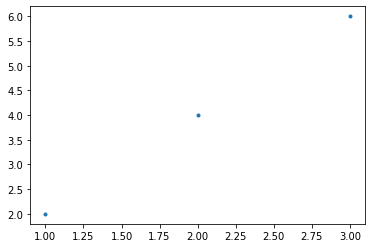

In [73]:
plt.plot([1,2,3],[2,4,6],'.')

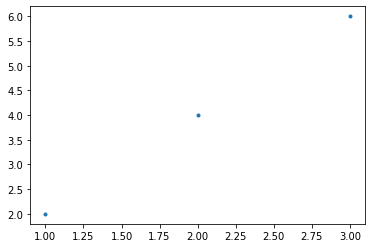

In [74]:
plt.plot(np.array([1,2,3]),np.array([2,4,6]),'.')

`-` 예제들

In [75]:
t=np.linspace(-6,6,100)
x=np.sin(t)
y=np.cos(t)

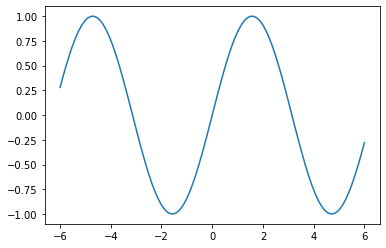

In [76]:
plt.plot(t,x)

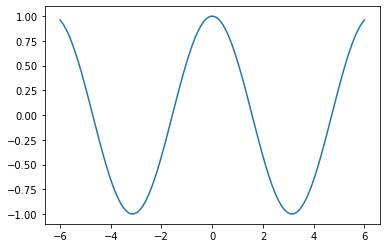

In [77]:
plt.plot(t,y)

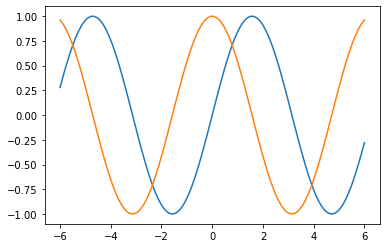

In [78]:
plt.plot(t,x)
plt.plot(t,y)

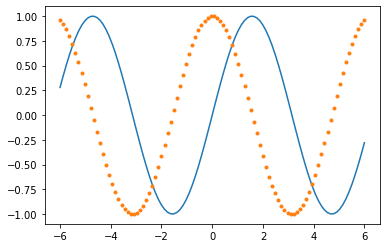

In [79]:
plt.plot(t,x)
plt.plot(t,y,'.')

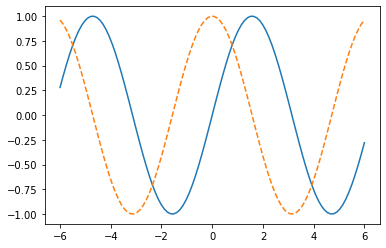

In [81]:
plt.plot(t,x)
plt.plot(t,y,'--')

#### plt.hist

In [82]:
X=np.random.randn(1000)
Y=np.random.rand(1000)

(array([  3.,  14.,  66., 157., 232., 245., 155.,  92.,  28.,   8.]),
 array([-3.29472542, -2.65210581, -2.0094862 , -1.36686658, -0.72424697,
        -0.08162736,  0.56099226,  1.20361187,  1.84623148,  2.4888511 ,
         3.13147071]),
 <BarContainer object of 10 artists>)

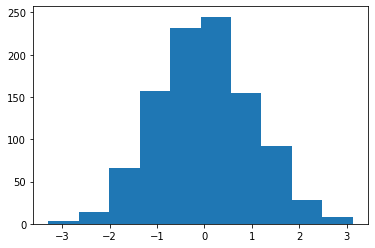

In [83]:
plt.hist(X)

(array([110., 100., 113.,  98.,  83., 103.,  97.,  89.,  95., 112.]),
 array([6.93471885e-04, 1.00483125e-01, 2.00272778e-01, 3.00062432e-01,
        3.99852085e-01, 4.99641738e-01, 5.99431391e-01, 6.99221045e-01,
        7.99010698e-01, 8.98800351e-01, 9.98590004e-01]),
 <BarContainer object of 10 artists>)

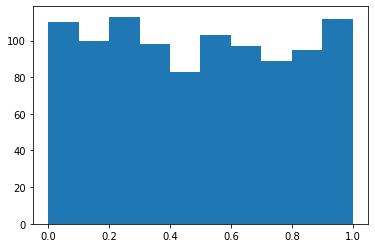

In [84]:
plt.hist(Y)